## ENDG 310
### Sept 12 Lecture

**Objectives**
- Opening and reading files
- Loading data
- Simple plots of the data

### Opening and reading files

In [ ]:
"""
Create a handle to the file

Ensure that a file named 'textdata.txt' exists in the current directory, 
    otherwise an error will be thrown.
"""

fileh = open('textdata.txt', 'r')


The `fileh` variable now has a pointer to the file.

In [ ]:
fileh

In [ ]:
# read() will read the entire file

fileh.read()

In [ ]:
# After a file has been read, there is no more to read, so calling read() a 
# second time will return nothing.

fileh.read()

In [ ]:
# A file handle always has to be closed!

fileh.close()

Using the `with` keyword automates the file closing.  Once the code inside the `with` is finished executing, `close()` will automatically be called.

In [ ]:
import sys
try:
    with open('textdata.txt', 'r') as file:
        content = file.read()
        print(content)
        contentlist = content.split(sep='\n')
        print(contentlist)
        print(file.closed)
        print('\n\n\n')
    print(file.closed)

except FileNotFoundError:
    print("File not found")
except PermissionError:
    print("Cannot modify file")

x=5
print(sys.getsizeof(x))

## Opening csv files.

The first method to open a `csv` file is as a file and then processing it manually.

In [ ]:
# Let's open a csv file and print the first 10 lines
with open('en_climate_hourly_AB_3031094_09-2023_P1H.csv', 'r') as file:
    for i in range(10):
        print(file.readline())

To use this data:
- read each line
- split on the ','
- convert each value to a string, integer, float, etc
- assemble these into arrays


In [ ]:
# Let's open a csv file and print the first 10 lines
long=[]
lat=[]
with open('en_climate_hourly_AB_3031094_09-2023_P1H.csv', 'r') as file:
    file.readline()
    for i in range(10):
        templine = file.readline()
        templist = templine.split(',')
        long.append(templist[0])
        lat.append(templist[1])
    print(long)
    print(lat)

This sounds cumbersone.  There are libraries we can use to do this for us.  `numpy` and `pandas` both have the ability to read `csv` files.

In [107]:
"""
Using Numpy
"""
import numpy as np

file = np.genfromtxt('en_climate_hourly_AB_3031094_09-2023_P1H.csv', delimiter=',', names=True)

print(file)

# Why didn't this work?  Not all rows have the same length.  Numpy requires that a 
# data file be 'square', or have the same number of columns in each row.

[(-114., 51.11, nan, 3031094., nan, 2023., 9.,  1., nan, 15.8, nan, 10.3, nan, 70., nan, 0. , nan, 35., nan, 12., nan, nan, nan, 88.86, nan, nan, nan, nan, nan, nan)
 (-114., 51.11, nan, 3031094., nan, 2023., 9.,  1., nan, 14.9, nan,  9.6, nan, 71., nan, 0. , nan, 34., nan, 10., nan, nan, nan, 88.91, nan, nan, nan, nan, nan, nan)
 (-114., 51.11, nan, 3031094., nan, 2023., 9.,  1., nan, 13.9, nan, 10.5, nan, 80., nan, 0. , nan, 30., nan,  8., nan, nan, nan, 88.95, nan, nan, nan, nan, nan, nan)
 (-114., 51.11, nan, 3031094., nan, 2023., 9.,  1., nan, 14.2, nan,  9.4, nan, 73., nan, 0. , nan, 31., nan, 13., nan, nan, nan, 88.95, nan, nan, nan, nan, nan, nan)
 (-114., 51.11, nan, 3031094., nan, 2023., 9.,  1., nan, 13.9, nan,  9.5, nan, 75., nan, 0. , nan, 32., nan,  9., nan, nan, nan, 89.  , nan, nan, nan, nan, nan, nan)
 (-114., 51.11, nan, 3031094., nan, 2023., 9.,  1., nan, 13.9, nan,  9.7, nan, 76., nan, 0. , nan, 33., nan, 13., nan, nan, nan, 89.03, nan, nan, nan, nan, nan, nan)
 (-1

In [106]:
import numpy as np 

a1= np.zeros([10,5])
print(a1)
x=np.random.random(100000)
%timeit sorted(x) 
%timeit np.sort(x)


[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
57.3 ms ± 3.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.39 ms ± 29.8 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## Pandas

In [136]:
import pandas as pd

area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297, 'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict.values())
print(area)
population = pd.Series(area_dict.keys())
states = pd.DataFrame({'population': population,'area': area})
print(states)
print()
print(states.index)
print()
print(states.columns)
print()
states.info()


0    423967
1    695662
2    141297
3    170312
4    149995
dtype: int64
   population    area
0  California  423967
1       Texas  695662
2    New York  141297
3     Florida  170312
4    Illinois  149995

RangeIndex(start=0, stop=5, step=1)

Index(['population', 'area'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   population  5 non-null      object
 1   area        5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


In [138]:
# Pandas has more error handling capabilties, and is able to to also automatically 
# detect the data type (int, float, date, etc) in each column.  Note, not all date 
# conversions are correct, so you may need to do that yourself.
import pandas as pd

file = pd.read_csv('en_climate_hourly_AB_3031094_09-2023_P1H.csv')
file


# Let's look at the first 5 rows
#file.head()
#file.info()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time (LST),Year,Month,Day,Time (LST),Temp (°C),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,-114,51.11,CALGARY INT'L CS,3031094,9/1/2023 0:00,2023,9,1,0:00,15.8,...,NaN,NaN,NaN,88.86,NaN,NaN,NaN,NaN,NaN,NaN
1,-114,51.11,CALGARY INT'L CS,3031094,9/1/2023 1:00,2023,9,1,1:00,14.9,...,NaN,NaN,NaN,88.91,NaN,NaN,NaN,NaN,NaN,NaN
2,-114,51.11,CALGARY INT'L CS,3031094,9/1/2023 2:00,2023,9,1,2:00,13.9,...,NaN,NaN,NaN,88.95,NaN,NaN,NaN,NaN,NaN,NaN
3,-114,51.11,CALGARY INT'L CS,3031094,9/1/2023 3:00,2023,9,1,3:00,14.2,...,NaN,NaN,NaN,88.95,NaN,NaN,NaN,NaN,NaN,NaN
4,-114,51.11,CALGARY INT'L CS,3031094,9/1/2023 4:00,2023,9,1,4:00,13.9,...,NaN,NaN,NaN,89.00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,-114,51.11,CALGARY INT'L CS,3031094,9/11/2023 19:00,2023,9,11,19:00,19.4,...,NaN,NaN,NaN,89.00,NaN,NaN,NaN,NaN,NaN,NaN
260,-114,51.11,CALGARY INT'L CS,3031094,9/11/2023 20:00,2023,9,11,20:00,17.3,...,NaN,NaN,NaN,88.99,NaN,NaN,NaN,NaN,NaN,NaN
261,-114,51.11,CALGARY INT'L CS,3031094,9/11/2023 21:00,2023,9,11,21:00,17.6,...,NaN,NaN,NaN,88.96,NaN,NaN,NaN,NaN,NaN,NaN
262,-114,51.11,CALGARY INT'L CS,3031094,9/11/2023 22:00,2023,9,11,22:00,16.7,...,NaN,NaN,NaN,88.95,NaN,NaN,NaN,NaN,NaN,NaN


## Plotting data

`matplotlib` is an excellent library to use to plot data.  Other libraries (like `plotly` utilize `matplotlib` or use similar commands)

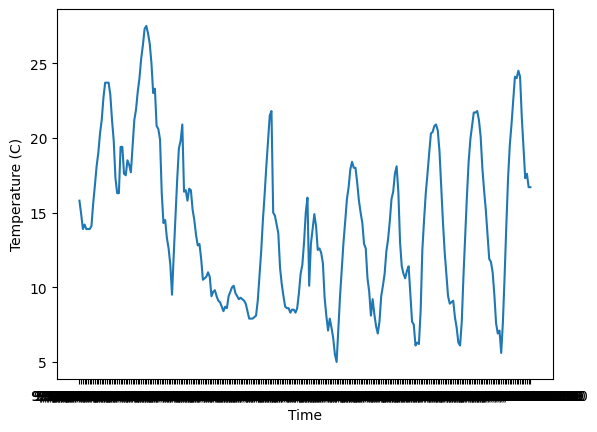

In [139]:
# First, import the library
import matplotlib.pyplot as plt


# Let's plot temperature vs date
plt.plot(file['Date/Time (LST)'], file['Temp (°C)'])
plt.xlabel('Time')
plt.ylabel('Temperature (C)')
plt.show()

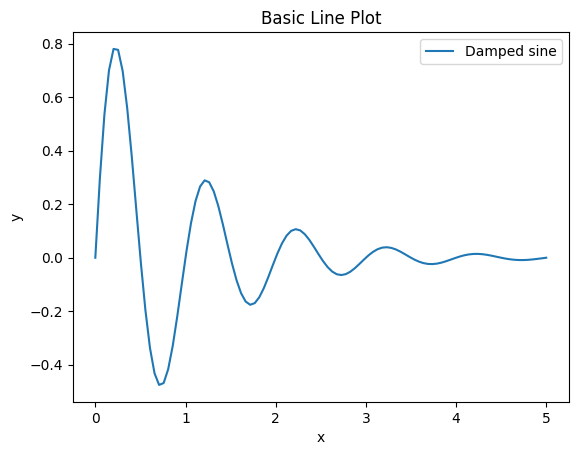

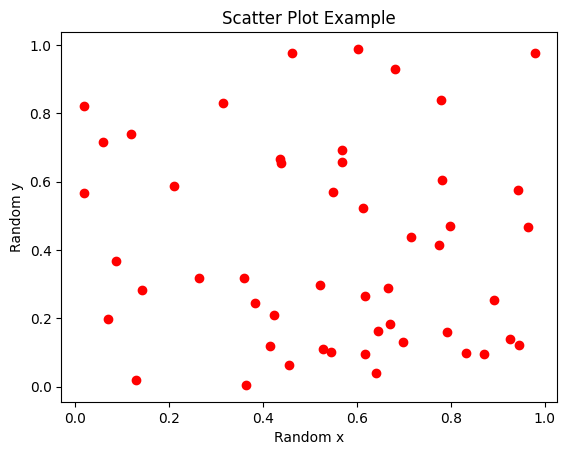

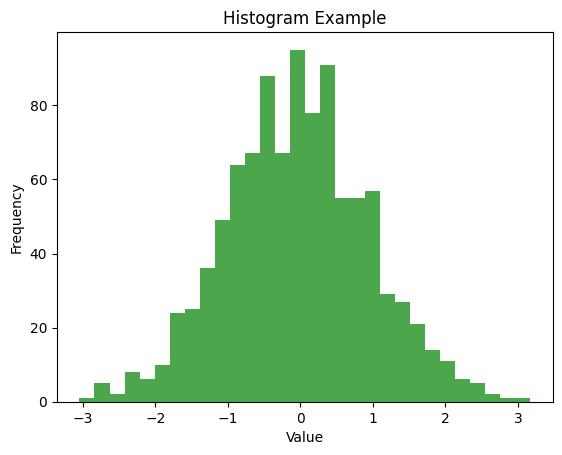

In [135]:
import numpy as np

# --- Matplotlib: Basic line plot ---
x = np.linspace(0, 5, 100)
y = np.exp(-x) * np.sin(2 * np.pi * x)
plt.figure()
plt.plot(x, y, label='Damped sine')
plt.title('Basic Line Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# --- Matplotlib: Scatter plot ---
np.random.seed(0)
x = np.random.rand(50)
y = np.random.rand(50)
plt.figure()
plt.scatter(x, y, c='red', marker='o')
plt.title('Scatter Plot Example')
plt.xlabel('Random x')
plt.ylabel('Random y')
plt.show()

# --- Matplotlib: Histogram ---
data = np.random.normal(loc=0, scale=1, size=1000)
plt.figure()
plt.hist(data, bins=30, alpha=0.7, color='green')
plt.title('Histogram Example')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
